### ANALYSIS ON NUCLEAR WEAPONS TESTS FROM 1945 TO 2019

### CONTENTS
- [x] Introduction
- [x] Libraries imports 
- [x] Loading of dataset 
- [x] Dataset exploration 
- [x] Data manipulation
- [x] Data visualization
- [x] Conclusion

### INTRODUCTION

 According to wiikipedia Nuclear weapons tests are experiments carried out to determine nuclear weapons' effectiveness, yield, and explosive capability. Testing nuclear weapons offers practical information about how the weapons function, how detonations are affected by different conditions, and how personnel, structures, and equipment are affected when subjected to nuclear explosions. However, nuclear testing has often been used as an indicator of scientific and military strength. Many tests have been overtly political in their intention; most nuclear weapons states publicly declared their nuclear status through a nuclear test. 
 
 ABOUT THE DATA
 
  This data was collected from https://www.kaggle.com,  The data shows the year of each nuclear test by their country. The dataset is reliable, original and comprehensive. The source has their own licence over the dataset. Besides that, the dataset doesn't have any personal information. All the files have consistent columns and each column has the correct type of data. Finally, It would be good to have some updated information about the nuclear weapons tests.

### Question(s) for Analysis
The following are a list of questions to be answered after carefully studying the dataset:
* Country with the highest nuclear weapons tests from 1945-2019
* Country with the lowest nuclear weapons tests from 1945-2019
* Country with the highest nuclear weapon test in a calendar year
* Country with the lowest nuclear weapon test in a calendar year 
* Percentage of nuclear weapons tests by countries
* Countries that have tested nuclear weapons consistently for years

In [1]:
# Nuclear Weapons Tests Analysis with Pandas & Plotly
# We will be using the following Python Libraries: 
# • Pandas
# • Matplotlib
# • Plotly

In [2]:
# We will cover the following chart types:
# • Histogram
# • Area Chart
# • Pie Chart
# • Bar Charts

### IMPORT OUR LIBRARIES

In [ ]:
# Imports:
import pandas as pd
import plotly
import plotly.express as px
import plotly.io as pio

pio.renderers

LOADING DATASET

In [4]:
# Now we are going to load our dataset
df = pd.read_csv("nuclear.csv")

In [5]:
df.head()

,country_name,year,nuclear_weapons_tests
0,China,1945,0
1,China,1946,0
2,China,1947,0
3,China,1948,0
4,China,1949,0


### DATASET EXPLORATION
In this part I will be exploring the dataset

In [6]:
# Basic info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   country_name           600 non-null    object
 1   year                   600 non-null    int64 
 2   nuclear_weapons_tests  600 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 14.2+ KB


In [7]:

# Describe methed
df.describe()

,year,nuclear_weapons_tests
count,600.000000,600.000000
mean,1982.000000,3.431667
std,21.666774,9.808789
min,1945.000000,0.000000
25%,1963.000000,0.000000
50%,1982.000000,0.000000
75%,2001.000000,1.000000
max,2019.000000,96.000000


In [8]:
# Get a view of a unique value in column e.g. 'country_name'
df['country_name'].unique()

array(['China', 'France', 'India', 'North Korea', 'Pakistan', 'Russia',
       'United Kingdom', 'United States'], dtype=object)

In [9]:
# Check for null values
df.isnull()

,country_name,year,nuclear_weapons_tests
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
595,False,False,False
596,False,False,False
597,False,False,False
598,False,False,False


In [10]:
# NoN count for each column
df.isnull().sum()

country_name             0
year                     0
nuclear_weapons_tests    0
dtype: int64

### DATA MANIPULATION
Carrying out data manipulation on my dataset in order to gain more insights from my dataset.

First, we find country with the highest and lowest nuclear weapons tests in a year


In [11]:
# Country with the highest Nuclear weapons tests in a year
df.nlargest(1,'nuclear_weapons_tests')

,country_name,year,nuclear_weapons_tests
542,United States,1962,96


In [12]:
# Country with the smallest Nuclear testsin a year
df.nsmallest(1, 'nuclear_weapons_tests')

,country_name,year,nuclear_weapons_tests
0,China,1945,0


Finding total sum of nuclear weapons tests per country and grouping them by country names

In [13]:
# Find the total Nuclear weapon tests per country since 1945 to 2019
total =  df.groupby('country_name', as_index=False)['nuclear_weapons_tests'].sum()
total.head()

,country_name,nuclear_weapons_tests
0,China,45
1,France,210
2,India,3
3,North Korea,9
4,Pakistan,2


In [14]:
total.tail()

,country_name,nuclear_weapons_tests
3,North Korea,9
4,Pakistan,2
5,Russia,715
6,United Kingdom,45
7,United States,1030


 ### DATA VISUALIZATION
 Visualizing my data 

#### CHART 1: HISTOGRAM SHOWING TOTAL NUCLEAR WEAPONS TEST PER COUNTRY FROM 1945-2019
Creating a histogram chart to show the total nuclear weapons test per country from 1945 to 2019

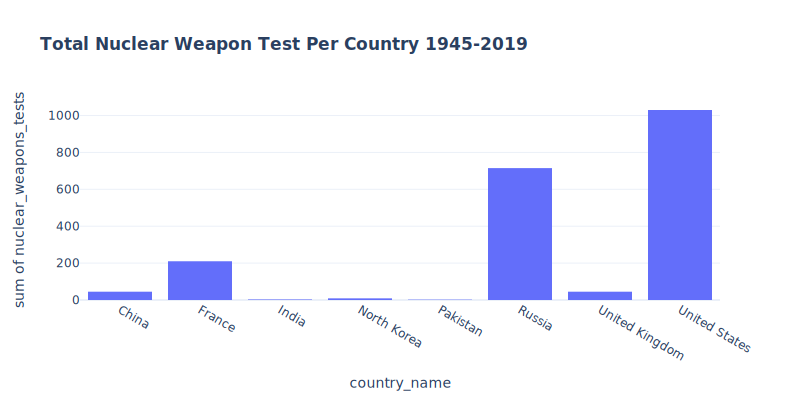

In [15]:
# Create Chart
template_style = 'plotly_white'
fig = px.histogram(total,
                   x ='country_name',
                   y = 'nuclear_weapons_tests',
                   title = '<b>Total Nuclear Weapon Test Per Country 1945-2019</b>',
                   template = template_style,
                   width=800, height=400)
    
# Plot chart
fig.show(renderer='svg', engine='kaleido')

#### CHART 2: USING AREA CHART TO CHECK FOR TRENDS
Checking for trends in nuclear weapons tests from 1945-2019 using Area Chart

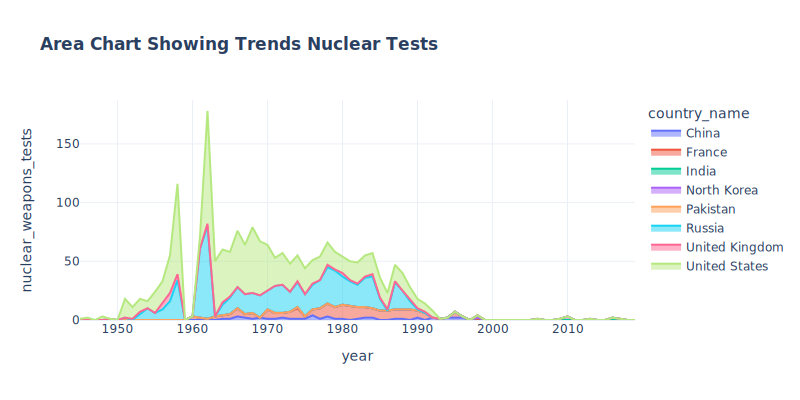

In [16]:
# Create Chart
fig = px.area(df,
             x = 'year',
             y = 'nuclear_weapons_tests',
             color = 'country_name',
             template = template_style,
              title = '<b>Area Chart Showing Trends Nuclear Tests</b>',
              width=800, height=400)


# Display Plot
fig.show(renderer='svg', engine='kaleido')

#### CHART 3: PIE CHART SHOWING PERCENTAGE OF WHOLE
I would create a pie chart showing the percentage each country has used in nuclear weapons testing from 1945-2019

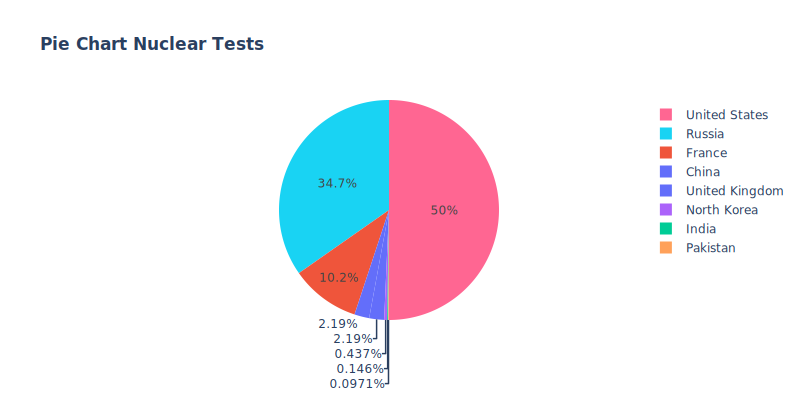

In [17]:
# Create Chart
fig = px.pie(total, 'country_name',
             'nuclear_weapons_tests',
             color = 'nuclear_weapons_tests',
              title = '<b>Pie Chart Nuclear Tests</b>',
             width=800, height=400)


# Display Plot
fig.show(renderer='svg', engine='kaleido')

#### CHART 4: BAR CHART SHOWING AMOUNT OF YEARLY NUCLEAR WEAPONS TESTS PER EACH COUNTRY

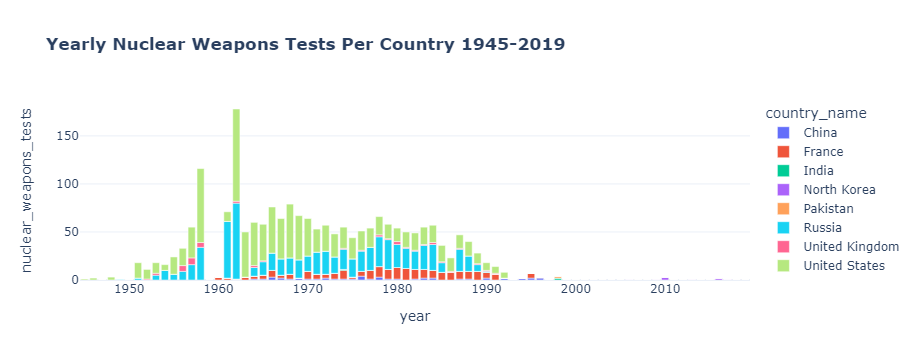

In [23]:
# Create a chart
template_style = 'plotly_white'
fig = px.bar(df,
             x = 'year',
             y = 'nuclear_weapons_tests',
             color = 'country_name',
             color_continuous_scale = ['green', 'yellow', 'red'],
             title = '<b>Yearly Nuclear Weapons Tests Per Country 1945-2019</b>',
             template = template_style,)

# Display plot
fig.show(renderer='jupyterlab', engine='kaleido')

#### CHART 5: SCATTER PLOT SHOWING LINEAR CORRELATION BETWEEN YEAR/NUCLEAR WEAPONS TESTS
Is there any correlation between Year/Nuclear Weapons Tests & country [Scatter Plot]

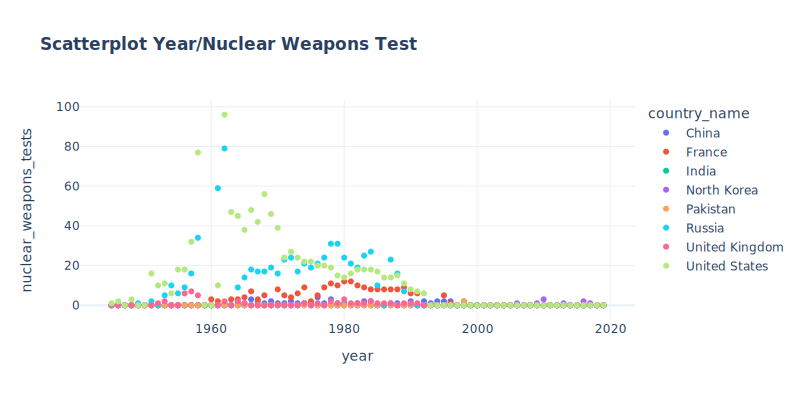

In [24]:

fig = px.scatter(df,
             x = 'year',
             y = 'nuclear_weapons_tests',
             color = 'country_name',
             width=800, height=400,
                  template = template_style,
            title = '<b>Scatterplot Year/Nuclear Weapons Test</b>')

fig.show(renderer='svg', engine='kaleido')

### CONCLUSION

#### In this conclusion I would talk about the noticed trends in my insights

Since the end of world war 2, various nuclear weapons tests has been carried out by some countries, which is the basis of my analysis and insights. This analysis gave me some important insights on how countries has been testing nuclear weapons for years. What I found out was that;

* The United States carried out the highest nuclear weapons test from 1945 to 2019 with a total of 1030 tests.
* Russia had the second highest nuclear weapons tests from 1945 to 2019 with a total of 715 tests.
* Pakistan had the lowest nuclear weapons test with a total of 2 tests.
* The United States had the highest nuclear weapons tests in a calendar year with a total of 96 tests in 1962.
* China had no nuclear weapons tests in 1945 but had a total of 45 nuclear weapons tests since 1945 to 2019.
* The United States has tested about 50% of the world's nuclear weapons test from 1945 to 2019.
* Within 1955 to 1956 the United States has carried out about 36 nuclear weapons tests with each of the year having 18 tests each.
* The United States had a consistent nuclear weapons tests from 1971 to 1992, making it 21 years of consistent nuclear weapons testing.
* France also had a consistent nuclear weapons testing from 1970 to 1991 making it 21 years of consistent nuclear weapons testing.
* Russia's consistent nuclear weapons testing occurred between 1964 to 1985 making it also 21 years of consistent nuclear weapons testing.
* The U.S, Russia and France had 21 years each of consistent nuclear weapons testing.
* Russia has tested 34.7% of the world's nuclear weapons tests, while France has tested 10.2% of the world's nuclear weapons tests, making them one of the top 3 nuclear weapons testers.
* This report shows that the United states, Russia and France has carried out 94.9% of the world's nuclear weapons tests from 1945 to 2019.
